Student Perfomance Predictor

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [ ]:
df = pd.read_csv(r"Dataset\StudentPerformanceFactors.csv")


In [ ]:
df.head()
df.info()
df.describe()
df.isnull().sum()

In [26]:
x = df[["Hours_Studied"]]
y =df[["Exam_Score"]]

In [ ]:
print(x.head())
print(y.head())

In [ ]:
plt.scatter(x,y,alpha=0.5)
plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")

In [38]:
x_train, x_test , y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state=42)
print("Traning set size: ", x_train.shape[0])
print("Testing set size: ", x_test.shape[0])

Traning set size:  5285
Testing set size:  1322


In [ ]:
#Model Traning

In [46]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Slope: ", model.coef_[0])
print("intercept",model.intercept_)

Slope:  [0.28566874]
intercept [61.51116747]


In [56]:
type(y_test)

pandas.core.frame.DataFrame

In [ ]:
y_pred = model.predict(x_test)
print("Actual vs Predicted Exam Score for first 10: ")

a = y_test.squeeze()
b = y_pred
pairs = list(zip(a,b))
for actual,predicted in pairs[:10]:
    print("Actual:",actual, "  Predicted:",round(predicted.item(),2)) 

In [71]:
mae = mean_absolute_error(a,b)
mse = mean_squared_error(a,b)
rmse = np.sqrt(mse)
r2 = r2_score(a,b)
print (round(mae,2))
print (round(mse,2))
print (round(rmse,2))
print (round(r2,2))

2.45
10.86
3.29
0.23


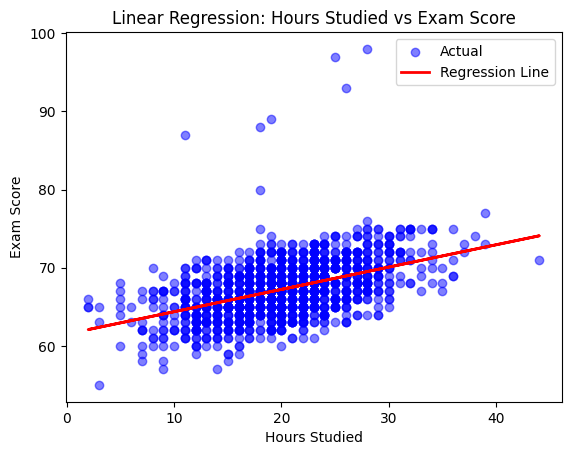

In [73]:
plt.scatter(x_test, y_test, color="blue", alpha=0.5, label="Actual")

# Regression line
plt.plot(x_test, y_pred, color="red", linewidth=2, label="Regression Line")

plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression: Hours Studied vs Exam Score")
plt.legend()
plt.show()
